In [1]:
#import some necessary librairies
from scipy.stats import boxcox
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
from sklearn.preprocessing import RobustScaler
 
from scipy import stats
from scipy.stats import norm, skew #for some statistics
 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
 
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8")) #check the files available in the directory
from sklearn.preprocessing import LabelEncoder


8-8bad
cant-buy-competition
external
external-v2
external-v3
external-v4
know-123
old-score
old-score2
old-score861
old-score867
old-score872
old-score91
photo123
test-photo-v1



In [2]:
train = pd.read_csv('/kaggle/input/external-v4/external_v4/train_record.csv')
test = pd.read_csv('/kaggle/input/external-v4/external_v4/test_record.csv')

In [3]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (11751, 35) 
The test data size before dropping Id feature is : (5876, 34) 


**Data process**

In [4]:
train['鄉鎮市區'] = train['縣市'] + '_' + train['鄉鎮市區']

Skewness: 0.254670
Kurtosis: 0.034378


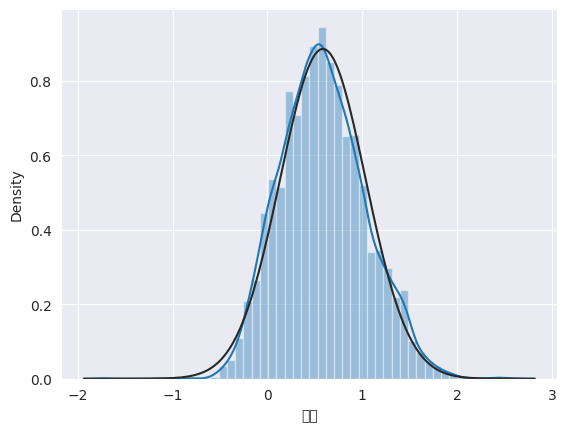

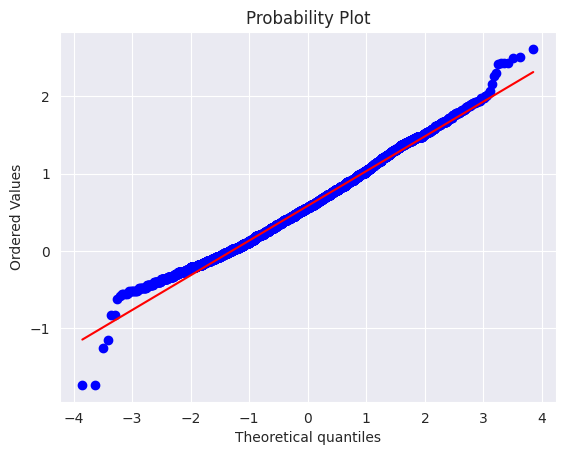

In [5]:
train['單價']=np.log(train['單價'])
sns.distplot(train['單價'], fit=norm)
fig=plt.figure()
res=stats.probplot(train['單價'], plot=plt)
print("Skewness: %f" % train['單價'].skew())
print("Kurtosis: %f" % train['單價'].kurt())

In [6]:
selected_columns = ["縣市", "鄉鎮市區", "主要用途", "主要建材","建物型態", "單價"]
#"路名"
train_object = train[selected_columns].copy()

In [7]:


data = train_object.groupby(["縣市"])[["單價"]].agg(['mean','median','count'])
sort_data = data.sort_values(by=("單價", "median"), ascending=True)

# 建立字典，將路名作為鍵，median作為值
city_dict = dict(zip(sort_data.index, sort_data[("單價", "median")]))



data = train_object.groupby(["鄉鎮市區"])[["單價"]].agg(['mean','median','count'])
sort_data = data.sort_values(by=("單價", "median"), ascending=True)

# 建立字典，將路名作為鍵，median作為值
area_dict = dict(zip(sort_data.index, sort_data[("單價", "median")]))



data = train_object.groupby(["主要用途"])[["單價"]].agg(['mean','median','count'])
sort_data = data.sort_values(by=("單價", "median"), ascending=True)

# 建立字典，將路名作為鍵，median作為值
use_dict = dict(zip(sort_data.index, sort_data[("單價", "median")]))


data = train_object.groupby(["主要建材"])[["單價"]].agg(['mean','median','count'])
sort_data = data.sort_values(by=("單價", "median"), ascending=True)

# 建立字典，將路名作為鍵，median作為值
built_dict = dict(zip(sort_data.index, sort_data[("單價", "median")]))




In [8]:
# 使用字典轉換相應特徵列
train['縣市'] = train['縣市'].map(city_dict)
train['鄉鎮市區'] = train['鄉鎮市區'].map(area_dict)
train['主要用途'] = train['主要用途'].map(use_dict)
train['主要建材'] = train['主要建材'].map(built_dict)


In [9]:
import pandas as pd

# 使用 get_dummies 函数进行 One-Hot 编码
train = pd.get_dummies(train, columns=["建物型態"], prefix=["建物型態"])
#train = train[train['ID'] != 'TR-7110']

In [10]:
train = train.drop(['ID', '備註','使用分區','路名'], axis=1)

In [11]:
import pandas as pd
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [12]:
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler


X = train.drop(['單價'], axis=1)
y = train['單價']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

rf_regressor = RandomForestRegressor(n_estimators=100, max_features=0.3, min_samples_leaf=1, min_samples_split=4, bootstrap=False)

rf_regressor.fit(X_train, y_train)

y_pred_1 = rf_regressor.predict(X_test)
mape = mean_absolute_error(y_test, y_pred_1)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.39%


In [14]:
rf_regressor = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=4,
    min_samples_leaf=1,
    max_features=0.3,
    bootstrap=False,
)
rf_regressor.fit(X_train, y_train)

y_train_1 = rf_regressor.predict(X_train)
y_pred_1 = rf_regressor.predict(X_test)

mape = mean_absolute_error(y_test, y_pred_1)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.31%


In [15]:
y_train_original_scale = np.exp(y_train)
y_train1_original_scale = np.exp(y_train_1)
y_test_original_scale = np.exp(y_test)
y_pred1_original_scale = np.exp(y_pred_1)

mape_train = mean_absolute_error(y_train_original_scale, y_train1_original_scale)
mape_val = mean_absolute_error(y_test_original_scale, y_pred1_original_scale)
print(f"Mean Absolute Percentage Error (train): {mape_train * 100:.2f}%")
print(f"Mean Absolute Percentage Error (val): {mape_val * 100:.2f}%")

Mean Absolute Percentage Error (train): 1.43%
Mean Absolute Percentage Error (val): 16.09%


In [16]:
regr = xgb.XGBRegressor(
    learning_rate=0.1,
    max_depth=9,
    min_child_weight=1,
    n_estimators=100,
    n_jobs=1,
    objective='reg:squarederror',
    subsample=0.9500000000000001,
    verbosity=0
)

lightgbm = lgb.LGBMRegressor(
    #device='gpu',
    objective='regression',
    num_leaves=500,
    learning_rate=0.05,
    n_estimators=500,
    max_bin=200,
    min_child_samples=20,
    bagging_fraction=0.8,  # 更新为最佳参数
    bagging_freq=4,        # 更新为最佳参数
    bagging_seed=42,
    feature_fraction=0.4,  # 更新为最佳参数
    feature_fraction_seed=7,
    verbose=-1,
)


In [17]:
from catboost import CatBoostRegressor, Pool

cbr =  CatBoostRegressor(iterations=4000,  # 迭代次數
                        learning_rate=0.05,  # 學習率
                        depth=8,  # 樹的深度
                        l2_leaf_reg=3,  # L2 正則化項
                        random_seed=32,  # 隨機種子，可選
                        verbose=0)

cbr.fit(X_train, y_train)

# 預測
y_pred_2 = cbr.predict(X_test)
y_train_2 = cbr.predict(X_train)
# 計算 MAPE
mape = mean_absolute_error(y_test, y_pred_2)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.26%


In [18]:
y_train_original_scale = np.exp(y_train)
y_train1_original_scale = np.exp(y_train_2)
y_test_original_scale = np.exp(y_test)
y_pred1_original_scale = np.exp(y_pred_2)

mape_train = mean_absolute_error(y_train_original_scale, y_train1_original_scale)
mape_val = mean_absolute_error(y_test_original_scale, y_pred1_original_scale)
print(f"Mean Absolute Percentage Error (train): {mape_train * 100:.2f}%")
print(f"Mean Absolute Percentage Error (val): {mape_val * 100:.2f}%")

Mean Absolute Percentage Error (train): 4.01%
Mean Absolute Percentage Error (val): 15.66%


In [19]:
GBoost = GradientBoostingRegressor(learning_rate=0.05, max_depth=7, min_samples_leaf=1,
                                   min_samples_split=4, n_estimators=500, subsample=0.8)



GBoost.fit(X_train, y_train)

y_pred_3 = GBoost.predict(X_test)
mape = mean_absolute_error(y_test, y_pred_3)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.49%


In [20]:
y_pred_3 = GBoost.predict(X_test)
y_train_3 = GBoost.predict(X_train)

y_train_original_scale = np.exp(y_train)
y_train1_original_scale = np.exp(y_train_3)
y_test_original_scale = np.exp(y_test)
y_pred1_original_scale = np.exp(y_pred_3)

mape_train = mean_absolute_error(y_train_original_scale, y_train1_original_scale)
mape_val = mean_absolute_error(y_test_original_scale, y_pred1_original_scale)
print(f"Mean Absolute Percentage Error (train): {mape_train * 100:.2f}%")
print(f"Mean Absolute Percentage Error (val): {mape_val * 100:.2f}%")

Mean Absolute Percentage Error (train): 7.20%
Mean Absolute Percentage Error (val): 16.32%


In [21]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
alphas = [0.00000001,0.00001,0.0001,0.001,0.01,0.1, 1.0, 10.0,15.0] 
e_alphas = [0.0001, 0.0005, 0.0001, 0.05,0.1, 1.0, 10.0, 100.0]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor




ridge = RidgeCV(alphas=alphas, cv=kfolds)

lasso = LassoCV(alphas=alphas, random_state=42, cv=kfolds)

knn =  KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')

ENet = ElasticNetCV(alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio)

svr = SVR(kernel='poly',C= 10, epsilon= 0.008, gamma=0.0001,)

extra_trees_regressor = ExtraTreesRegressor(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

gbdt_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

adaboost_regressor = AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, random_state=42)


8.49

In [23]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(knn,ridge, GBoost, regr,svr, lightgbm,rf_regressor),
                                meta_regressor=cbr,
                                use_features_in_secondary=True)

stack_gen_model1 = stack_gen.fit(np.array(X_train), np.array(y_train))


# 使用Stacking模型进行预测
y_pred_4 = stack_gen_model1.predict(np.array(X_test))
mape = mean_absolute_error(y_test, y_pred_4)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.03148e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=8.95856e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.08913e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=9.01282e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will b

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.23437e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.16866e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.1884e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.1263e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
Mean Absolute Percentage Error (MAPE): 8.20%


In [24]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(regr,rf_regressor,ENet,lasso,extra_trees_regressor),
                                meta_regressor=regr,
                                use_features_in_secondary=True)

stack_gen_model2 = stack_gen.fit(np.array(X_train), np.array(y_train))

# 使用Stacking模型进行预测
y_pred_5 = stack_gen_model2.predict(np.array(X_test))
mape = mean_absolute_error(y_test, y_pred_2)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.26%


In [25]:
import numpy as np
from itertools import product
from sklearn.metrics import mean_absolute_error

# 初始化最佳组合的变量
best_weights = None
best_mape = float('inf')
#, y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8, y_pred_9
#y_pred_1, y_pred_2, y_pred_4, y_pred_9
# 所有预测的列表
#all_preds = [ y_pred_1, y_pred_2,y_pred_3,y_pred_4, y_pred_5, y_pred_6, y_pred_7, y_pred_8 ,y_pred_9]
all_preds = [y_pred_1, y_pred_2,y_pred_3,y_pred_4, y_pred_5]

# 尝试不同的权重组合
weights_combinations = product(np.linspace(0, 1, 21), repeat=5)  # 生成所有8个权重的组合

for weights in weights_combinations:
    if sum(weights) == 1:  # 权重总和为1
        # 计算加权预测结果
        weighted_pred = sum(pred * weight for pred, weight in zip(all_preds, weights))
        # 计算MAPE
        mape = mean_absolute_error(y_test, weighted_pred)
        # 如果MAPE更低，更新最佳组合
        if mape < best_mape:
            best_mape = mape
            best_weights = weights

# 打印最佳组合和对应的MAPE
print("Best Weights:", best_weights)
print("Best MAPE:", best_mape)


Best Weights: (0.15000000000000002, 0.35000000000000003, 0.0, 0.4, 0.1)
Best MAPE: 0.07998920558771161


In [26]:


best_weights = [0.25, 0.1, 0.25, 0.25, 0.15]


y_pred = sum(weight * pred for weight, pred in zip(best_weights, all_preds))
#y_pred= y_pred_1*0.4+y_pred_2*0.2+y_pred_4*0.1+y_pred_9*0.3

mape = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.06%


In [27]:
y_pred = sum(weight * pred for weight, pred in zip(best_weights, all_preds))
#y_pred= y_pred_1*0.4+y_pred_2*0.2+y_pred_4*0.1+y_pred_9*0.3

mape = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 8.06%


In [28]:
mean_value = np.mean(y_pred)
print("平均值:", mean_value)
median_value = np.median(y_pred)
print("中位数:", median_value)
std_value = np.std(y_pred)
print("标准差:", std_value)

平均值: 0.5922731561621728
中位数: 0.5684149776565617
标准差: 0.4305637642184656


In [29]:


y_pred_1_train = rf_regressor.predict(X_train)
y_pred_2_train = cbr.predict(X_train)
y_pred_3_train = GBoost.predict(X_train)
y_pred_4_train = stack_gen_model1.predict(np.array(X_train))
y_pred_5_train = stack_gen_model2.predict(np.array(X_train))

all_preds_train = [y_pred_1_train, y_pred_2_train,y_pred_3_train ,y_pred_4_train,y_pred_5_train]


y_pred_train = sum(weight * pred for weight, pred in zip(best_weights, all_preds_train))

mape = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 1.66%


In [30]:
mean_value = np.mean(y_pred_train)
print("平均值:", mean_value)
median_value = np.median(y_pred_train)
print("中位数:", median_value)
std_value = np.std(y_pred_train)
print("标准差:", std_value)

平均值: 0.5845478536306687
中位数: 0.5612169687342897
标准差: 0.44808984822662


In [31]:
test = pd.read_csv('/kaggle/input/external-v4/external_v4/test_record.csv')
test_id = test['ID'].copy()

#test = test.drop(['ID', '備註','使用分區','橫坐標','縱坐標','建物型態'], axis=1)
test = test.drop(['ID', '備註','使用分區','路名'], axis=1)
#,'車位個數','陽台面積','火車站'

test['鄉鎮市區'] = test['縣市'] + '_' + test['鄉鎮市區']
test = pd.get_dummies(test, columns=["建物型態"], prefix=["建物型態"])

In [32]:
#label_encoder = LabelEncoder()

#test['縣市'] = label_encoder.fit_transform(test['縣市'])
#test['鄉鎮市區'] = label_encoder.fit_transform(test['鄉鎮市區'])
#test['路名'] = label_encoder.fit_transform(test['路名'])
#test['主要用途'] = label_encoder.fit_transform(test['主要用途'])
#test['主要建材'] = label_encoder.fit_transform(test['主要建材'])
#test['建物型態'] = label_encoder.fit_transform(test['建物型態'])
# 打印编码后的DataFrame
test

,縣市,鄉鎮市區,土地面積,移轉層次,總樓層數,主要用途,主要建材,屋齡,建物面積,車位面積,...,火車站,醫療院所,小學,國中,高中,大學,建物型態_住宅大樓(11層含以上有電梯),建物型態_公寓(5樓含以下無電梯),建物型態_華廈(10層含以下有電梯),建物型態_透天厝
0,新北市,新北市_樹林區,2.039,3,7,住家用,鋼筋混凝土造,13.917,0.472,0.146,...,6,7,4,5,2,9,False,False,True,False
1,新北市,新北市_三重區,-0.078,5,5,住家用,鋼筋混凝土造,40.833,-0.546,-0.819,...,6,22,14,11,25,25,False,True,False,False
2,新北市,新北市_板橋區,-0.556,2,20,集合住宅,鋼筋混凝土造,1.333,0.124,-0.167,...,8,26,5,15,23,26,True,False,False,False
3,新北市,新北市_泰山區,-0.745,6,16,住家用,鋼筋混凝土造,27.500,-0.027,0.115,...,8,12,4,7,8,16,True,False,False,False
4,台北市,台北市_信義區,-0.611,3,7,住家用,鋼筋混凝土造,40.500,-0.864,-0.819,...,7,93,14,16,31,20,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,台南市,台南市_中西區,0.560,5,5,集合住宅,鋼筋混凝土造,0.833,-0.788,-0.016,...,4,9,9,9,18,9,False,True,False,False
5872,台中市,台中市_北區,-1.020,5,22,集合住宅,鋼筋混凝土造,3.417,-0.910,0.800,...,11,38,15,16,17,13,True,False,False,False
5873,新北市,新北市_新店區,-0.663,10,12,住家用,鋼筋混凝土造,12.583,-0.460,0.004,...,6,18,2,5,14,18,True,False,False,False
5874,台北市,台北市_信義區,0.514,2,5,住家用,鋼筋混凝土造,36.250,0.357,-0.819,...,8,51,10,12,29,19,False,True,False,False


In [33]:
# 使用字典轉換相應特徵列，並提供默認值0
test['縣市'] = test['縣市'].map(city_dict).fillna(-1)
test['鄉鎮市區'] = test['鄉鎮市區'].map(area_dict).fillna(0)
#test['路名'] = test['路名'].map(road_dict).fillna(0)
test['主要用途'] = test['主要用途'].map(use_dict).fillna(0.55)
test['主要建材'] = test['主要建材'].map(built_dict).fillna(0.62)
# 打印轉換後的數據集


In [34]:
test


,縣市,鄉鎮市區,土地面積,移轉層次,總樓層數,主要用途,主要建材,屋齡,建物面積,車位面積,...,火車站,醫療院所,小學,國中,高中,大學,建物型態_住宅大樓(11層含以上有電梯),建物型態_公寓(5樓含以下無電梯),建物型態_華廈(10層含以下有電梯),建物型態_透天厝
0,0.660,0.452,2.039,3,7,0.571,0.544,13.917,0.472,0.146,...,6,7,4,5,2,9,False,False,True,False
1,0.660,0.718,-0.078,5,5,0.571,0.544,40.833,-0.546,-0.819,...,6,22,14,11,25,25,False,True,False,False
2,0.660,0.774,-0.556,2,20,0.531,0.544,1.333,0.124,-0.167,...,8,26,5,15,23,26,True,False,False,False
3,0.660,0.459,-0.745,6,16,0.571,0.544,27.500,-0.027,0.115,...,8,12,4,7,8,16,True,False,False,False
4,1.170,1.213,-0.611,3,7,0.571,0.544,40.500,-0.864,-0.819,...,7,93,14,16,31,20,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5871,0.149,0.163,0.560,5,5,0.531,0.544,0.833,-0.788,-0.016,...,4,9,9,9,18,9,False,True,False,False
5872,0.350,0.281,-1.020,5,22,0.531,0.544,3.417,-0.910,0.800,...,11,38,15,16,17,13,True,False,False,False
5873,0.660,0.763,-0.663,10,12,0.571,0.544,12.583,-0.460,0.004,...,6,18,2,5,14,18,True,False,False,False
5874,1.170,1.213,0.514,2,5,0.571,0.544,36.250,0.357,-0.819,...,8,51,10,12,29,19,False,True,False,False


In [35]:

# 使用訓練好的模型對標準化後的測試數據進行預測
y_pred_1_test = rf_regressor.predict(test)
y_pred_2_test = cbr.predict(test)
y_pred_3_test = GBoost.predict(test)
y_pred_4_test = stack_gen_model1.predict(np.array(test))
y_pred_5_test = stack_gen_model2.predict(np.array(test))



In [36]:
y_pred_1_test = np.exp(y_pred_1_test)
y_pred_2_test = np.exp(y_pred_2_test)
y_pred_3_test = np.exp(y_pred_3_test)
y_pred_4_test = np.exp(y_pred_4_test)
y_pred_5_test = np.exp(y_pred_5_test)


In [37]:
all_preds_test = [ y_pred_1_test, y_pred_2_test,y_pred_3_test ,y_pred_4_test,y_pred_5_test]
y_pred_test = sum(weight * pred for weight, pred in zip(best_weights, all_preds_test))


In [38]:
#y_pred_test= y_pred_1_test*0.2+y_pred_2_test*0.2+y_pred_3_test*0.2+y_pred_4_test*0.25+y_pred_5_test*0.15

In [39]:
mean_value = np.mean(y_pred_test)
print("平均值:", mean_value)
median_value = np.median(y_pred_test)
print("中位数:", median_value)
std_value = np.std(y_pred_test)
print("标准差:", std_value)

平均值: 1.9933144039351136
中位数: 1.749313557386488
标准差: 0.953428684714638


In [40]:
mean_value = np.mean(y_pred_test)
print("平均值:", mean_value)
median_value = np.median(y_pred_test)
print("中位数:", median_value)
std_value = np.std(y_pred_test)
print("标准差:", std_value)

平均值: 1.9933144039351136
中位数: 1.749313557386488
标准差: 0.953428684714638


In [41]:
from sklearn.metrics import mean_absolute_error
#CNN
import pandas as pd

actual_prices = pd.read_csv('/kaggle/input/know-123/submission (7).csv')
actual_prices  = actual_prices["predicted_price"]


mape = mean_absolute_error(actual_prices, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 42.76%


In [42]:
#856
import pandas as pd

actual_data = pd.read_csv('/kaggle/input/old-score2/Submission (21).csv')
actual_prices = actual_data['predicted_price']

mape = mean_absolute_error(actual_prices, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 5.35%


In [43]:
#867
import pandas as pd

actual_data = pd.read_csv('/kaggle/input/old-score867/8.6756.csv')
actual_prices = actual_data['predicted_price']

mape = mean_absolute_error(actual_prices, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 6.20%


In [44]:
#861
import pandas as pd

actual_data = pd.read_csv('/kaggle/input/old-score861/Submission (19).csv')
actual_prices = actual_data['predicted_price']

mape = mean_absolute_error(actual_prices, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 5.48%


In [45]:
#872
import pandas as pd

actual_data = pd.read_csv('/kaggle/input/old-score872/Submission (18).csv')
actual_prices = actual_data['predicted_price']

mape = mean_absolute_error(actual_prices, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 5.97%


In [46]:
#8.8
import pandas as pd

actual_data = pd.read_csv('/kaggle/input/old-score/8.8.csv')
actual_prices = actual_data['predicted_price']

mape = mean_absolute_error(actual_prices, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 5.96%


In [47]:
#91
import pandas as pd

actual_data = pd.read_csv('/kaggle/input/old-score91/Submission (20).csv')
actual_prices = actual_data['predicted_price']

mape = mean_absolute_error(actual_prices, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

Mean Absolute Percentage Error (MAPE): 7.37%


In [48]:
#805
import pandas as pd

actual_data = pd.read_csv('/kaggle/input/know-123/Submission (25).csv')
actual_prices = actual_data['predicted_price']

mape = mean_absolute_error(actual_prices, y_pred_test)
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

# [1  1] 50% 8.51375   [1  2] 66%  8.50825  [1   3]  75%  8.51355   [2  3]  60% 8.507344  [0.43 0.565]  56.5% last(27)

Mean Absolute Percentage Error (MAPE): 5.09%


In [49]:
import pandas as pd

# 创建一个DataFrame包含test_id和y_pred_original_scale列
submission_df = pd.DataFrame({'ID': test_id, 'predicted_price': y_pred_test})

# 将DataFrame保存为CSV文件
submission_df.to_csv('Submission.csv', index=False)

In [50]:
mean_value = np.mean(y_pred_test)
print("平均值:", mean_value)
median_value = np.median(y_pred_test)
print("中位数:", median_value)
std_value = np.std(y_pred_test)
print("标准差:", std_value)

平均值: 1.9933144039351136
中位数: 1.749313557386488
标准差: 0.953428684714638


In [51]:
test1 = pd.read_csv('/kaggle/input/know-123/Submission (38).csv')
test2 = pd.read_csv('/kaggle/input/know-123/Submission (28).csv')

y_pred_test1 = test1["predicted_price"]
y_pred_test2 = y_pred_test
y_pred_test = (y_pred_test2*0.5+y_pred_test1*0.5)